In [122]:
import io
import re
import string
import tqdm
from collections import defaultdict
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [123]:
s1="Never forget what you are The rest of the world will not Wear it like armor and it can never be used to hurt you"
s2="Any man who must say I am the king is no true king I make sure you understand that when I've won your war for you"
s3="Winter is coming"
s4="women are beautiful while men are smart"

In [124]:
tokens= []
for s in [s1,s2,s3,s4]:
    tokens += list(s.lower().split())
    
tokens_uniques = list(set(tokens))    
print(tokens_uniques)
print(len(tokens_uniques))

['man', 'used', 'wear', 'men', 'what', 'sure', 'will', 'make', 'who', 'of', 'won', 'not', "i've", 'war', 'be', 'women', 'understand', 'world', 'never', 'forget', 'hurt', 'for', 'when', 'coming', 'you', 'it', 'and', 'can', 'smart', 'the', 'rest', 'king', 'i', 'to', 'is', 'that', 'winter', 'any', 'no', 'beautiful', 'say', 'while', 'like', 'true', 'must', 'armor', 'am', 'your', 'are']
49


In [125]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens_uniques)
 
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

Number of unique words in dictionary= 49
Dictionary is =  {'man': 1, 'used': 2, 'wear': 3, 'men': 4, 'what': 5, 'sure': 6, 'will': 7, 'make': 8, 'who': 9, 'of': 10, 'won': 11, 'not': 12, "i've": 13, 'war': 14, 'be': 15, 'women': 16, 'understand': 17, 'world': 18, 'never': 19, 'forget': 20, 'hurt': 21, 'for': 22, 'when': 23, 'coming': 24, 'you': 25, 'it': 26, 'and': 27, 'can': 28, 'smart': 29, 'the': 30, 'rest': 31, 'king': 32, 'i': 33, 'to': 34, 'is': 35, 'that': 36, 'winter': 37, 'any': 38, 'no': 39, 'beautiful': 40, 'say': 41, 'while': 42, 'like': 43, 'true': 44, 'must': 45, 'armor': 46, 'am': 47, 'your': 48, 'are': 49}


In [126]:
path_to_embeddings = './glove.6B.50d.txt'

In [127]:
def embedding_for_vocab(filepath, word_index, embedding_dim):
    
    vocab_size = len(word_index) + 1
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
 
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
 
    return embedding_matrix_vocab
 

In [128]:
embedding_dim = 50

embedding_matrix_vocab = embedding_for_vocab(
    './glove.6B.50d.txt', tokenizer.word_index,
  embedding_dim)


In [129]:
def calculate_similarity(embedding_matrix,word_index, word1, word2):
    idx1 = word_index[word1]
    idx2 = word_index[word2]
    
    embedding1 = embedding_matrix[idx1].reshape(1, -1)
    embedding2 = embedding_matrix[idx2].reshape(1, -1)
    
    similarity_score = cosine_similarity(embedding1, embedding2)[0][0]
    return similarity_score

In [130]:
# List of word pairs
word_pairs = [('winter', 'coming'), ('women', 'smart'), ('men', 'smart'), ('women', 'men'),('men', 'beautiful'),('women', 'beautiful')]

# Calculate similarity scores for each pair of words
similarity_scores = [(pair, calculate_similarity(embedding_matrix_vocab, tokenizer.word_index, pair[0], pair[1])) for pair in word_pairs]

print("Similarity scores:")
for pair, score in similarity_scores:
    print(f"Similarity between '{pair[0]}' and '{pair[1]}': {score:.4f}")

Similarity scores:
Similarity between 'winter' and 'coming': 0.6625
Similarity between 'women' and 'smart': 0.3586
Similarity between 'men' and 'smart': 0.3538
Similarity between 'women' and 'men': 0.8736
Similarity between 'men' and 'beautiful': 0.4229
Similarity between 'women' and 'beautiful': 0.4415


In [131]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [132]:
model = loadGloveModel('./glove.6B.50d.txt')

Loading Glove Model
Done. 400000  words loaded!


In [133]:
def find_closest_embeddings(embedding): 
    return sorted(model.keys(), key=lambda word: spatial.distance.euclidean(model[word], embedding))

In [134]:
print(find_closest_embeddings(model["king"])[1:6])

['prince', 'queen', 'uncle', 'ii', 'grandson']


In [136]:
#Version latente
print(find_closest_embeddings(embeddings_dict["king"] - embeddings_dict["man"] + embeddings_dict["woman"])[1:6])

['queen', 'prince', 'elizabeth', 'daughter', 'widow']


In [137]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file= './glove.6B.50d.txt', word2vec_output_file="gensim_glove_vectors.txt")

C:\Users\ghamm\AppData\Local\Temp\ipykernel_28804\2764500000.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file= './glove.6B.50d.txt', word2vec_output_file="gensim_glove_vectors.txt")


(400000, 50)

In [138]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [139]:
resultat_vocabulaire = glove_model.most_similar(positive=['king', 'woman'], negative=['men'], topn=5)
print("Version vocabulaire de l'arithmétique :", resultat_vocabulaire)

Version vocabulaire de l'arithmétique : [('uncle', 0.7487497925758362), ('father', 0.7462866902351379), ('daughter', 0.7396753430366516), ('son', 0.7369706630706787), ('aunt', 0.7349787354469299)]


In [140]:
word_matrix = np.random.randn(len(tokens_uniques),50)
i = 0
for word in tokens_uniques:
    idx= tokenizer.word_index[word]
    word_matrix[i] = embedding_matrix_vocab[idx]
    i +=1
print(word_matrix)

[[-0.094386    0.43007001 -0.17224    ... -0.97925001  0.53135002
  -0.11725   ]
 [ 0.53964001 -0.13732     0.26655    ... -0.12983    -0.073696
  -0.42038   ]
 [-0.99413002  0.46722999 -0.87572998 ... -0.98250997 -0.42478999
   0.19351   ]
 ...
 [ 0.34663999  0.39805001  0.48969999 ...  0.086576    0.34037
   1.35880005]
 [-0.029163    0.81769001  0.3847     ... -0.54185998  0.32453001
   0.58424997]
 [ 0.96192998  0.012516    0.21732999 ...  0.14032    -0.38468
  -0.38712001]]


In [141]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
tsne_results = tsne.fit_transform(word_matrix)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 0.832146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.115705
[t-SNE] KL divergence after 1000 iterations: 0.796963


C:\Users\ghamm\AppData\Local\Temp\ipykernel_28804\2871287393.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))


Text(0.5, 1.0, 'TSNE representation for Word Embedding')

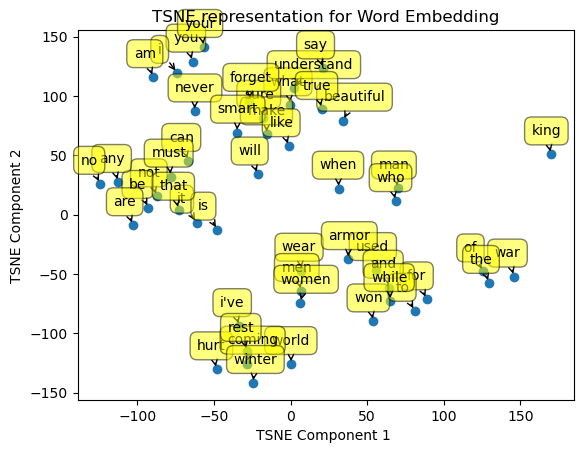

In [142]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(tokens_uniques,tsne_results[:,0],tsne_results[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('TSNE Component 1 ')
plt.ylabel('TSNE Component 2')
plt.title('TSNE representation for Word Embedding')